In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

from sklearn.neighbors import KernelDensity
from skimage.util import random_noise
from sklearn.metrics import mean_squared_error
from skimage.filters import laplace

#Question-01

Choose a 2D gray level image (Feel free to choose your own images) or a slice of a 3D gray level medical image.

Open it with Matlab and display it in a window using (for example) the “imshow” function.

In a second window display the histogram of the image.

Choose an interesting row or a column of the image (i.e. containing homogeneous and inhomogeneous areas, soft and sharp edges), and display it in a window using the “plot” function.

➔Question: How many modes does the histogram have? Can you identify each mode with specific structures in the image? Explain. [100 to 150 words]

Using the kernel density estimation, compute the probability density function (PDF) of the same image. What happens when you change the bandwidth from 0.8 to 1.8?

➔Question: How many modes are in the PDFs? Compare it to the modes you saw in the histogram of the same image.

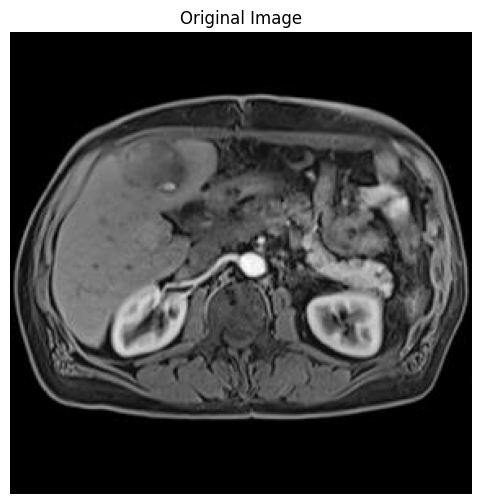

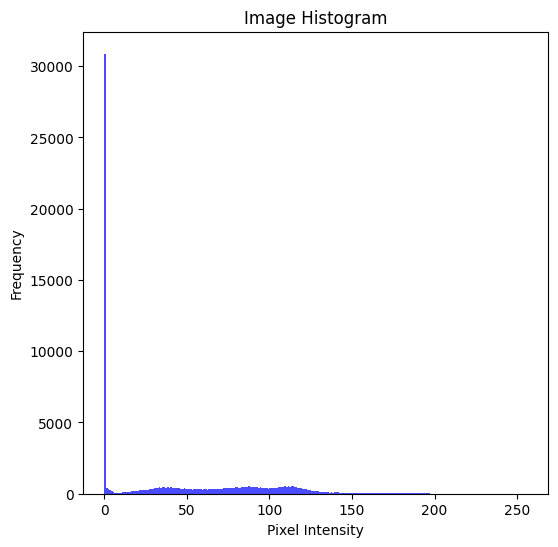

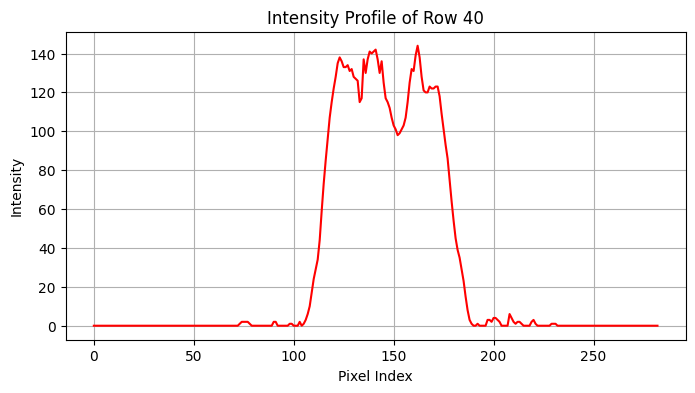

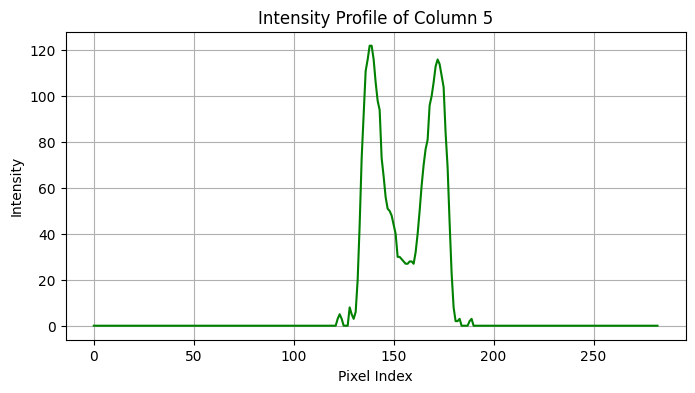

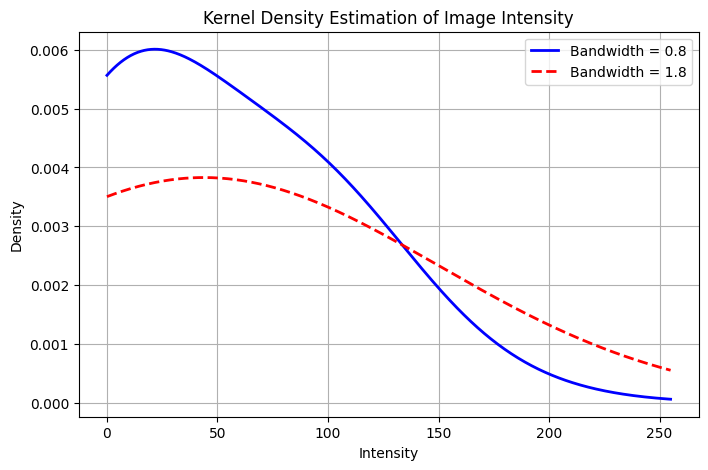

In [ ]:
# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/sample_images/liver.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Compute and display histogram
plt.figure(figsize=(6, 6))
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title('Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Select row 40 and column 5
selected_row = image[40, :]  # Row 40, all columns
column_5 = image[:, 5]  # All rows, column 5

# Plot intensity values along row 40
plt.figure(figsize=(8, 4))
plt.plot(selected_row, color='red', linewidth=1.5)
plt.title('Intensity Profile of Row 40')
plt.xlabel('Pixel Index')
plt.ylabel('Intensity')
plt.grid()
plt.show()

# Plot intensity values along column 5
plt.figure(figsize=(8, 4))
plt.plot(column_5, color='green', linewidth=1.5)
plt.title('Intensity Profile of Column 5')
plt.xlabel('Pixel Index')
plt.ylabel('Intensity')
plt.grid()
plt.show()

# Kernel Density Estimation (KDE) for PDF
image_flat = image.ravel().astype(np.float64)  # Flatten image to 1D

# Compute KDE for bandwidth = 0.8
kde_08 = gaussian_kde(image_flat, bw_method=0.8)
x_range = np.linspace(0, 255, 500)  # Range of intensity values
pdf_08 = kde_08(x_range)

# Compute KDE for bandwidth = 1.8
kde_18 = gaussian_kde(image_flat, bw_method=1.8)
pdf_18 = kde_18(x_range)

# Plot PDFs with different bandwidths
plt.figure(figsize=(8, 5))
plt.plot(x_range, pdf_08, label='Bandwidth = 0.8', color='blue', linewidth=2)
plt.plot(x_range, pdf_18, label='Bandwidth = 1.8', color='red', linewidth=2, linestyle='dashed')
plt.title('Kernel Density Estimation of Image Intensity')
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


#Question-02

Apply a 3x3 averaging filter to the original image. Display the filtered image.

Extract the same row or column as you did before from the original image, and display it using the “hold” and “plot” functions on the same graph as the original row or column but with a distinct color.

Apply a 3x3 median filter to the original image. Display the filtered image.
Extract the same row or column as you did before from the original and averaged images, and display it using the “hold” and “plot” functions on the same graph as the original row or column but with a distinct color.

➔Question: Based on both the image and the extracted row or column, compare the original image, the average-filtered image and the median-filtered image. What happens to homogeneous areas of the image? What happens to noisy areas of the image? What happens to edges? [100 to 150 words]

##Average Filter

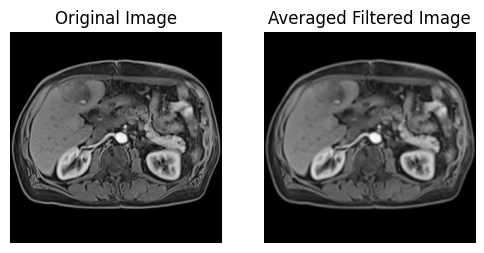

In [ ]:
#Importing Image
image = cv2.imread('/content/drive/MyDrive/sample_images/liver.jpg', cv2.IMREAD_GRAYSCALE)
# 3x3 averaging filter
kernel = np.ones((3, 3), np.float32) / 9
averaged_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(6, 4))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(averaged_image, cmap='gray')
plt.title('Averaged Filtered Image')
plt.axis('off')
plt.show()

##Median Filter

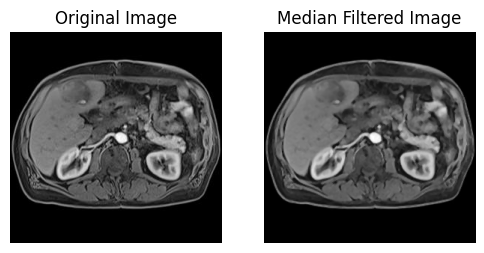

In [ ]:
# 3x3 median filter
median_filtered_image = cv2.medianBlur(image, 3)

plt.figure(figsize=(6, 4))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

##Row and Column

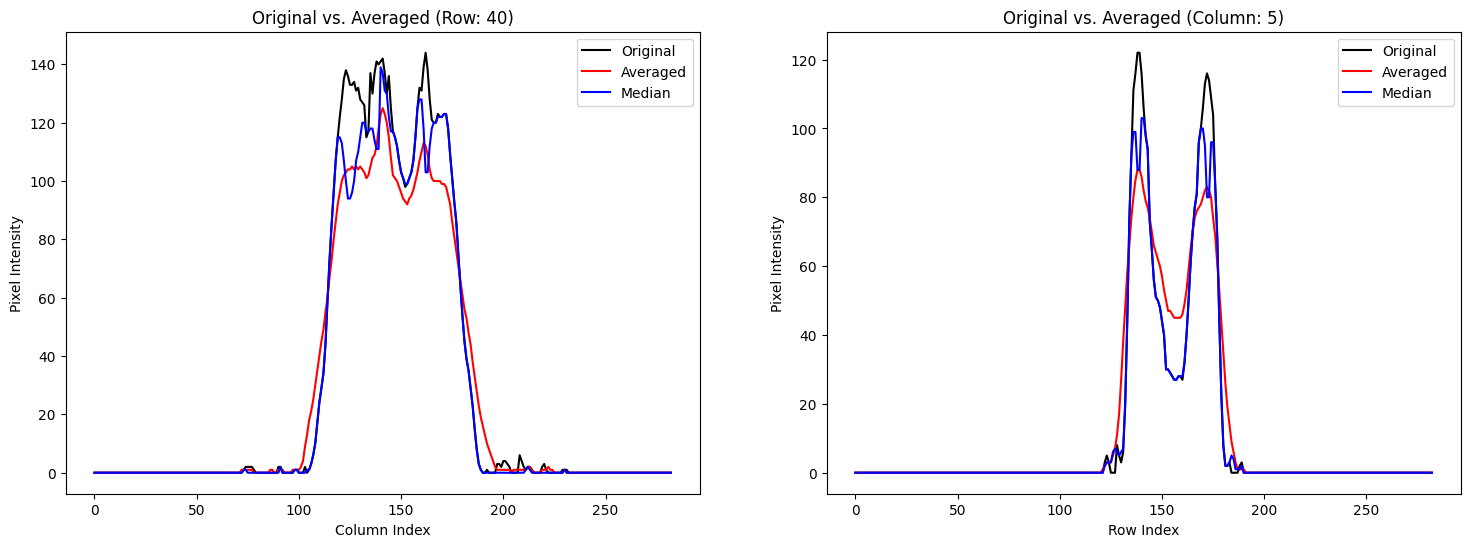

In [ ]:
# Select the row and column
row_index = 40
column_index = 5

# Row and Column Data
original_row_data = image[row_index, :]
original_col_data = image[:, column_index]

averaged_row_data = averaged_image[row_index, :]
averaged_col_data = averaged_image[:, column_index]

median_row_data = median_filtered_image[row_index, :]
median_col_data = median_filtered_image[:, column_index]

# Plot the results
plt.figure(figsize=(18, 6))

# Row Comparison
plt.subplot(1, 2, 1)
plt.plot(original_row_data, label='Original', color='black')
plt.plot(averaged_row_data, label='Averaged', color='red')
plt.plot(median_row_data, label='Median', color='blue')
plt.title('Original vs. Averaged (Row: 40)')
plt.xlabel('Column Index')
plt.ylabel('Pixel Intensity')
plt.legend()

# Column Comparison
plt.subplot(1, 2, 2)
plt.plot(original_col_data, label='Original', color='black')
plt.plot(averaged_col_data, label='Averaged', color='red')
plt.plot(median_col_data, label='Median', color='blue')
plt.title('Original vs. Averaged (Column: 5)')
plt.xlabel('Row Index')
plt.ylabel('Pixel Intensity')
plt.legend()

plt.show()

#Question-03

Pick some sample image, and using the MATLAB command imnoise generate two noisy versions of the image, one with salt and pepper noise and the other with Gaussian white noise. Specify linear (i.e. Gaussian filter) and order statistics filters (i.e. median filter) with different mask sizes, say for example, 3 × 3, 9 × 9, and 15 × 15. Apply both types of filters using the same mask size to the noisy images and compare their performance in terms of: mean squared error and general visual properties. Include snapshots and observations in your report.

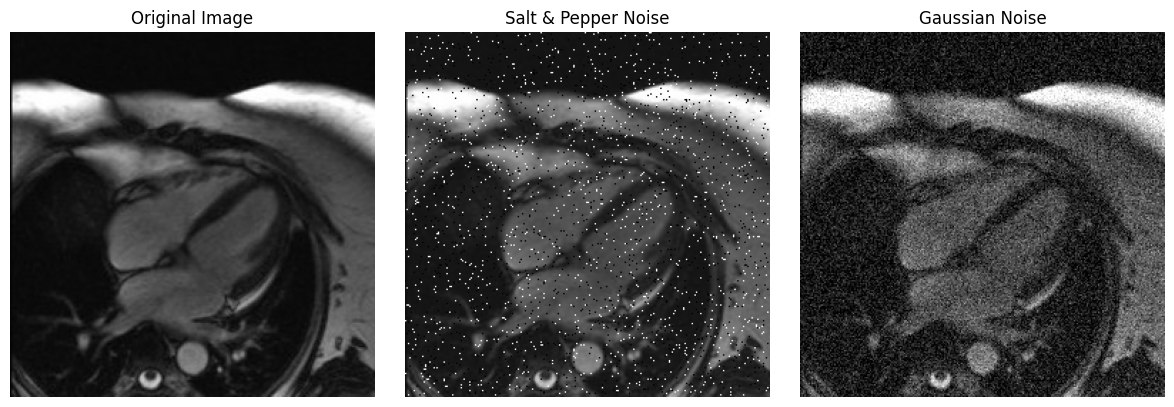

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import cv2
from scipy.stats import gaussian_kde
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (convert to grayscale for simplicity)
image = cv2.imread("/content/drive/MyDrive/sample_images/MRI_heart_4CB.jpg", cv2.IMREAD_GRAYSCALE)

# Function to add salt & pepper noise
def add_salt_pepper_noise(img, prob=.02):
    noisy = img.copy()
    num_salt = int(prob * img.size)
    num_pepper = int(prob * img.size)

    # Add salt (white) noise
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy[coords_salt[0], coords_salt[1]] = 255

    # Add pepper (black) noise
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy[coords_pepper[0], coords_pepper[1]] = 0

    return noisy

# Function to add Gaussian white noise
def add_gaussian_noise(img, mean=0, std=30):
    gauss = np.random.normal(mean, std, img.shape).astype(np.int16)
    noisy = cv2.add(img.astype(np.int16), gauss)
    noisy = np.clip(noisy, 0, 255)  # Ensure values remain valid
    return noisy.astype(np.uint8)

# Generate noisy images
sp_noisy = add_salt_pepper_noise(image, prob=0.02)
gaussian_noisy = add_gaussian_noise(image, mean=0, std=25)

# Display the original and noisy images for comparison
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

titles = ["Original Image", "Salt & Pepper Noise", "Gaussian Noise"]
images = [image, sp_noisy, gaussian_noisy]

for i in range(3):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


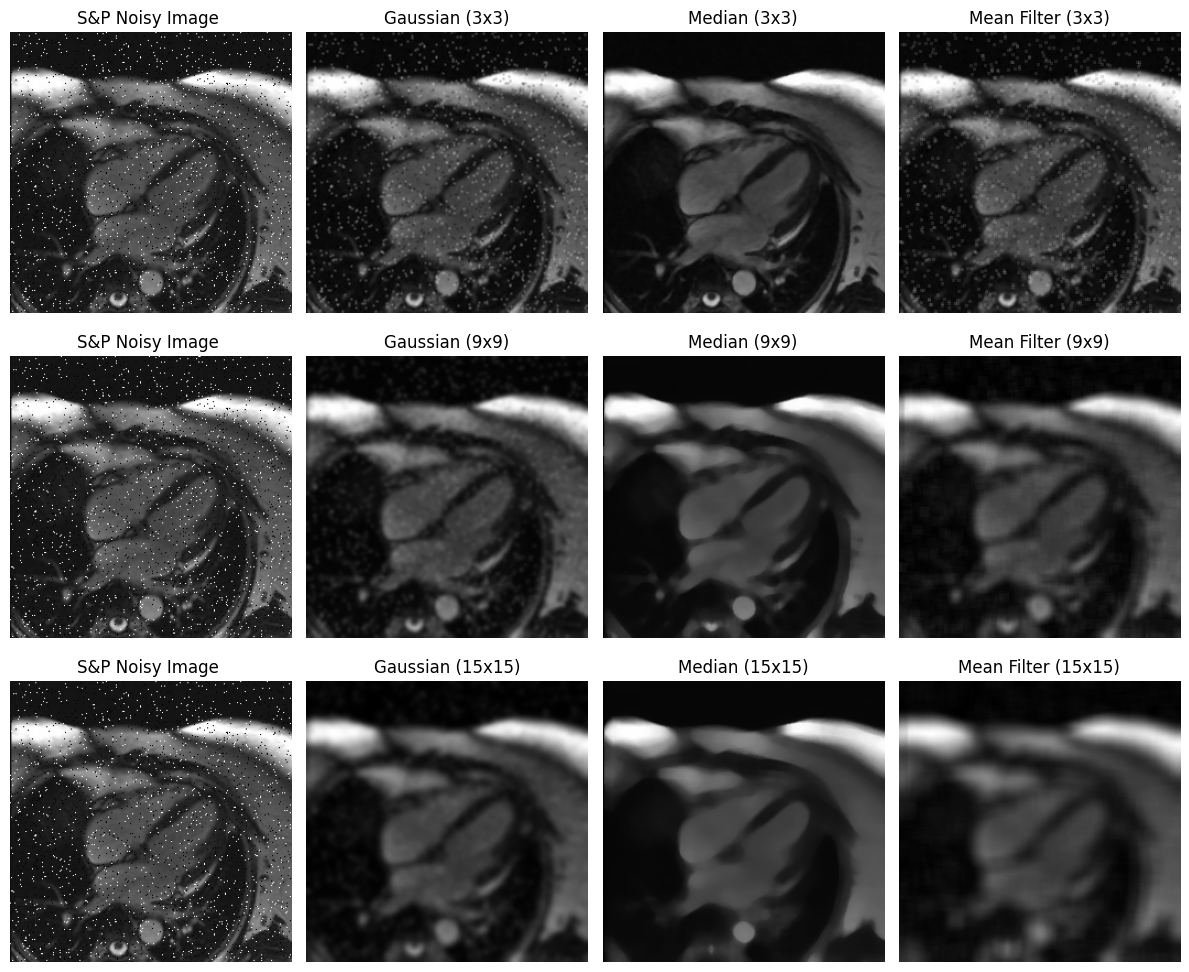

In [ ]:
#Salt and pepper case
#Gaussian filter
gaussian_3_sp = cv2.GaussianBlur(sp_noisy, (3, 3), 0)
gaussian_9_sp = cv2.GaussianBlur(sp_noisy, (9, 9), 0)
gaussian_15_sp = cv2.GaussianBlur(sp_noisy, (15, 15), 0)

#Median filtering
median_3_sp = cv2.medianBlur(sp_noisy, 3)
median_9_sp = cv2.medianBlur(sp_noisy, 9)
median_15_sp = cv2.medianBlur(sp_noisy, 15)

#Mean(avg) Filter
mean_3_sp = cv2.blur(sp_noisy, (3,3))
mean_9_sp = cv2.blur(sp_noisy, (9,9))
mean_15_sp = cv2.blur(sp_noisy, (15,15))

# Display results
fig, axes = plt.subplots(3, 4, figsize=(12, 10))

titles = [    "S&P Noisy Image ", "Gaussian (3x3)", "Median (3x3)", "Mean Filter (3x3)",
              "S&P Noisy Image ", "Gaussian (9x9)", "Median (9x9)", "Mean Filter (9x9)",
              "S&P Noisy Image ", "Gaussian (15x15)", "Median (15x15)", "Mean Filter (15x15)"]

images = [sp_noisy, gaussian_3_sp, median_3_sp ,mean_3_sp,
         sp_noisy, gaussian_9_sp, median_9_sp, mean_9_sp,
         sp_noisy, gaussian_15_sp, median_15_sp, mean_15_sp]

for i, ax in enumerate(axes.flat):
    if images[i] is not None:
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# Function to compute Mean Squared Error (MSE)
def calc_mse(original, filtered):
    return np.mean((original.astype("float") - filtered.astype("float")) ** 2)

#MSE for each filter and kernel size in S&P cases
mse_results_sp = {
    "Gaussian 3x3 (S&P)": calc_mse(image, gaussian_3_sp),
    "Gaussian 9x9 (S&P)": calc_mse(image, gaussian_9_sp),
    "Gaussian 15x15 (S&P)": calc_mse(image, gaussian_15_sp),
    "Median 3x3 (S&P)": calc_mse(image, median_3_sp),
    "Median 9x9 (S&P)": calc_mse(image, median_9_sp),
    "Median 15x15 (S&P)": calc_mse(image, median_15_sp),
    "Mean 3x3 (S&P)": calc_mse(image, mean_3_sp),
    "Mean 9x9 (S&P)": calc_mse(image, mean_9_sp),
    "Mean 15x15 (S&P)": calc_mse(image, mean_15_sp),
}

#Print results
for filter_name, mse_value in mse_results_sp.items():
    print(f"{filter_name}: MSE = {mse_value:.2f}")


Gaussian 3x3 (S&P): MSE = 143.94
Gaussian 9x9 (S&P): MSE = 80.87
Gaussian 15x15 (S&P): MSE = 114.98
Median 3x3 (S&P): MSE = 5.69
Median 9x9 (S&P): MSE = 57.47
Median 15x15 (S&P): MSE = 144.04
Mean 3x3 (S&P): MSE = 122.64
Mean 9x9 (S&P): MSE = 135.41
Mean 15x15 (S&P): MSE = 258.35


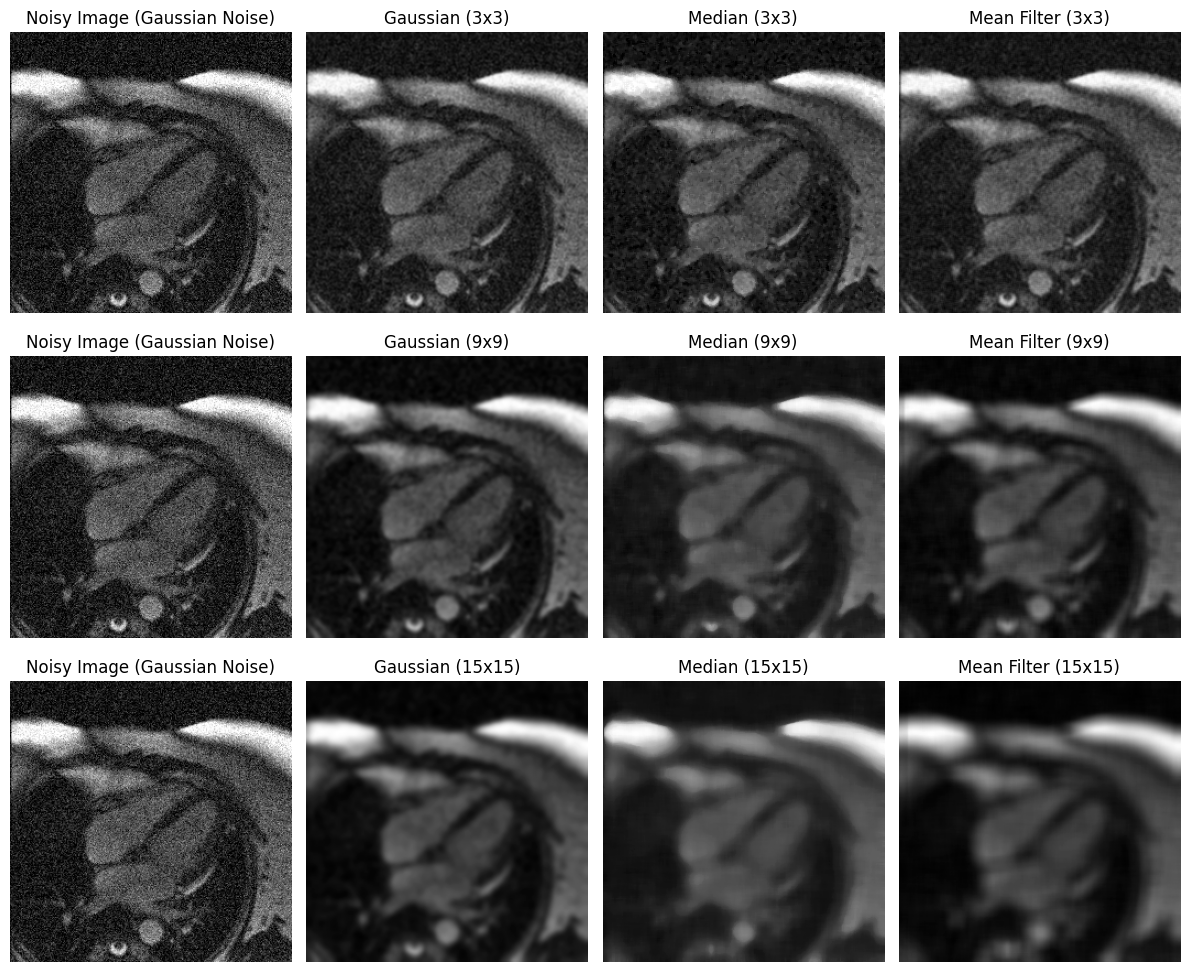

In [ ]:
#Gaussian noise case
#Gaussian filter
gaussian_3 = cv2.GaussianBlur(gaussian_noisy, (3, 3), 0)
gaussian_9 = cv2.GaussianBlur(gaussian_noisy, (9, 9), 0)
gaussian_15 = cv2.GaussianBlur(gaussian_noisy, (15, 15), 0)

#Median filter
median_3 = cv2.medianBlur(gaussian_noisy, 3)
median_9 = cv2.medianBlur(gaussian_noisy, 9)
median_15 = cv2.medianBlur(gaussian_noisy, 15)

# Mean(AVG) Filter
mean_3 = cv2.blur(gaussian_noisy, (3,3))
mean_9 = cv2.blur(gaussian_noisy, (9,9))
mean_15 = cv2.blur(gaussian_noisy, (15,15))

#Plot results
fig, axes = plt.subplots(3, 4, figsize=(12, 10))

titles = ["Noisy Image (Gaussian Noise)", "Gaussian (3x3)", "Median (3x3)", "Mean Filter (3x3)",
         "Noisy Image (Gaussian Noise)", "Gaussian (9x9)", "Median (9x9)", "Mean Filter (9x9)",
         "Noisy Image (Gaussian Noise)", "Gaussian (15x15)", "Median (15x15)", "Mean Filter (15x15)"]

images = [gaussian_noisy, gaussian_3, median_3 ,mean_3,
         gaussian_noisy, gaussian_9, median_9, mean_9,
         gaussian_noisy, gaussian_15, median_15, mean_15]

for i, ax in enumerate(axes.flat):
    if images[i] is not None:
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#MSE for each filter and kernel for gaussian case
mse_results_g = {
    "Gaussian 3x3": calc_mse(image, gaussian_3),
    "Gaussian 9x9": calc_mse(image, gaussian_9),
    "Gaussian 15x15": calc_mse(image, gaussian_15),
    "Median 3x3": calc_mse(image, median_3),
    "Median 9x9": calc_mse(image, median_9),
    "Median 15x15": calc_mse(image, median_15),
    "Mean 3x3": calc_mse(image, mean_3),
    "Mean 9x9": calc_mse(image, mean_9),
    "Mean 15x15": calc_mse(image, mean_15),
}

#Print MSE results
for filter_name, mse_value in mse_results_g.items():
    print(f"{filter_name}: MSE = {mse_value:.2f}")

Gaussian 3x3: MSE = 84.95
Gaussian 9x9: MSE = 63.87
Gaussian 15x15: MSE = 103.27
Median 3x3: MSE = 106.90
Median 9x9: MSE = 85.54
Median 15x15: MSE = 172.14
Mean 3x3: MSE = 74.43
Mean 9x9: MSE = 123.51
Mean 15x15: MSE = 249.68


#Question-04

Apply Laplacian-based contrast enhancement using different values of the alpha (a parameter of fspecial function in Matlab), which controls the shape of the Laplacian. Display the original image and the enhanced images. For those of you who are working on Python can apply Laplacian of Gaussian while varying the standard deviation of the Gaussian function.

Superimpose the raw or column extracted from the original and enhanced images.

➔Question: Based on both the image and the extracted row or column, compare the original image and the contrast-enhanced images. Which value of alpha provides the best visual results on your image? Explain. What happens to homogeneous areas of the image? What happens to noisy areas of the image? [100 to 150 words]

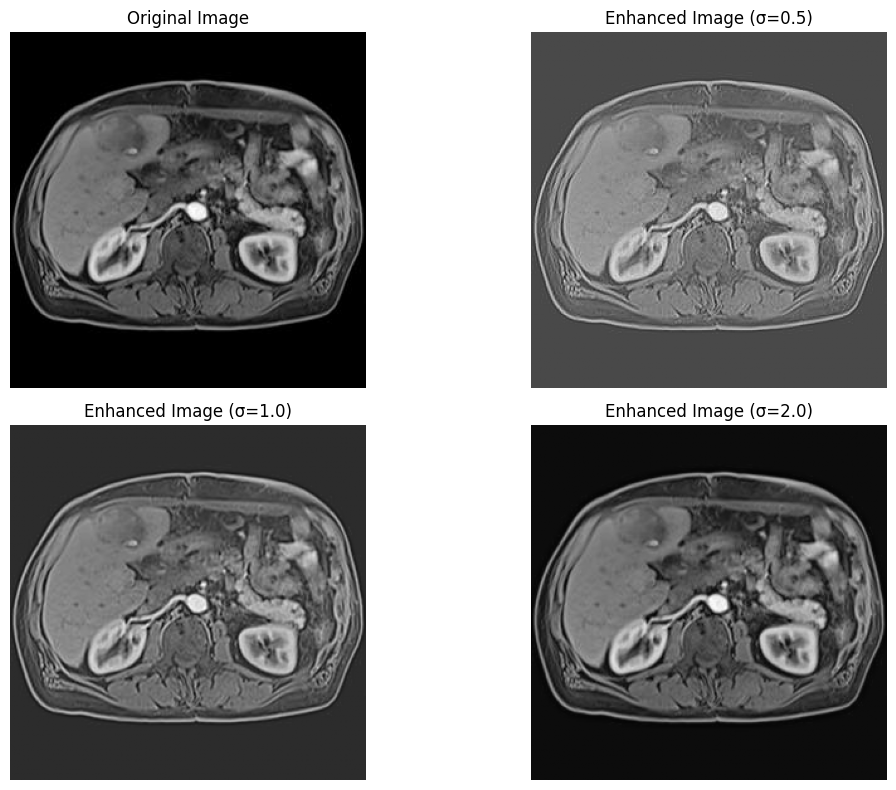

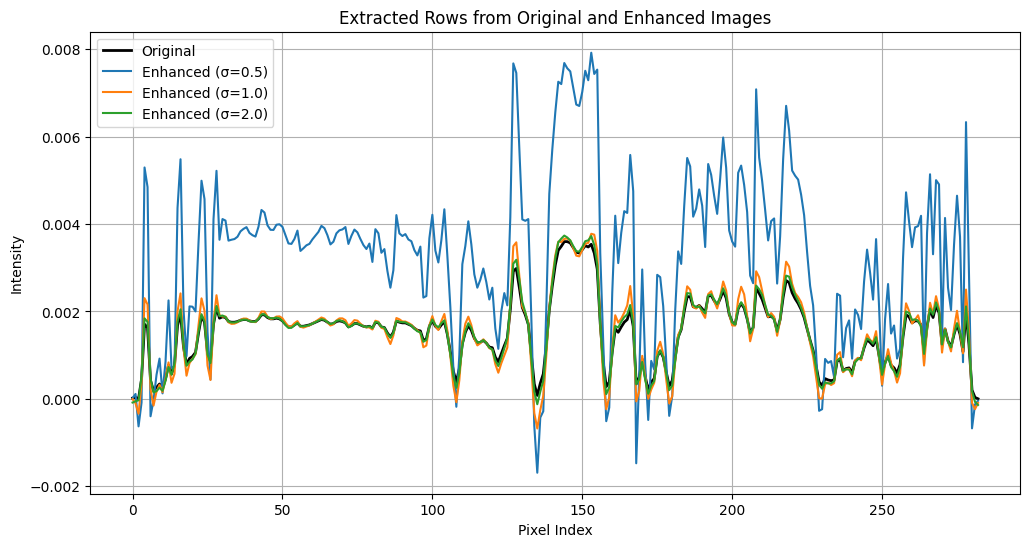

MSE for σ=0.5: 0.000002
MSE for σ=1.0: 0.000000
MSE for σ=2.0: 0.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.ndimage import gaussian_laplace
from skimage.metrics import mean_squared_error

# Load the grayscale image
image = io.imread('/content/drive/MyDrive/sample_images/liver.jpg', as_gray=True)
image = image / 255.0  # Normalize pixel values to [0, 1]

# Define Gaussian standard deviations (sigma) for LoG filtering
sigma_values = [0.5, 1.0, 2.0]

# Apply Laplacian of Gaussian (LoG) filtering and enhance contrast
enhanced_images = []
mse_values = []
for sigma in sigma_values:
    log_filtered = gaussian_laplace(image, sigma=sigma)
    enhanced_image = image - log_filtered  # Subtract LoG to enhance contrast
    enhanced_images.append(enhanced_image)

    # Compute Mean Squared Error (MSE) for quantitative evaluation
    mse = mean_squared_error(image, enhanced_image)
    mse_values.append(mse)

# Extract a row (e.g., center row) from original and enhanced images
row_index = image.shape[0] // 2
original_row = image[row_index, :]
enhanced_rows = [img[row_index, :] for img in enhanced_images]

# Plot the original and enhanced images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

for i, (sigma, enhanced_image) in enumerate(zip(sigma_values, enhanced_images)):
    plt.subplot(2, 2, i + 2)
    plt.title(f"Enhanced Image (σ={sigma})")
    plt.imshow(enhanced_image, cmap='gray')
    plt.axis("off")

plt.tight_layout()
plt.show()

# Plot extracted rows for comparison
plt.figure(figsize=(12, 6))
plt.title("Extracted Rows from Original and Enhanced Images")
plt.plot(original_row, label="Original", color="black", linewidth=2)
for i, (sigma, row) in enumerate(zip(sigma_values, enhanced_rows)):
    plt.plot(row, label=f"Enhanced (σ={sigma})", linewidth=1.5)
plt.xlabel("Pixel Index")
plt.ylabel("Intensity")
plt.legend()
plt.grid()
plt.show()

# Print MSE values for evaluation
for sigma, mse in zip(sigma_values, mse_values):
    print(f"MSE for σ={sigma}: {mse:.6f}")


#Question-05

Implement your own version of histogram equalization in Matlab or Python. Note that you should not use ‘histeq’ function in the image processing toolbox in Matlab.

Apply your own version of histogram equalization to a test medical image and include snapshots of it in the report.

➔Question: Please explain in your report why you will most likely not observe a uniform distribution after histogram equalization?

In [ ]:
# Histogram
histogram_image = cv2.imread('/content/drive/MyDrive/sample_images/X-ray.jpg', cv2.IMREAD_GRAYSCALE)
histogram, bins = np.histogram(histogram_image.flatten(), 256, [0, 256])

# Compute the CDF
cdf = histogram.cumsum()
cdf_normalized=[]
'''
# Normalize the CDF
cdf_normalized = (cdf / cdf[-1]) * 255
cdf_normalized = [round(value) for value in cdf_normalized]
'''
# Normalize the CDF
cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255
cdf_normalized = np.round(cdf_normalized).astype('uint8')

# Map the original image
equalized_image = cdf_normalized[histogram_image.flatten()].reshape(histogram_image.shape)

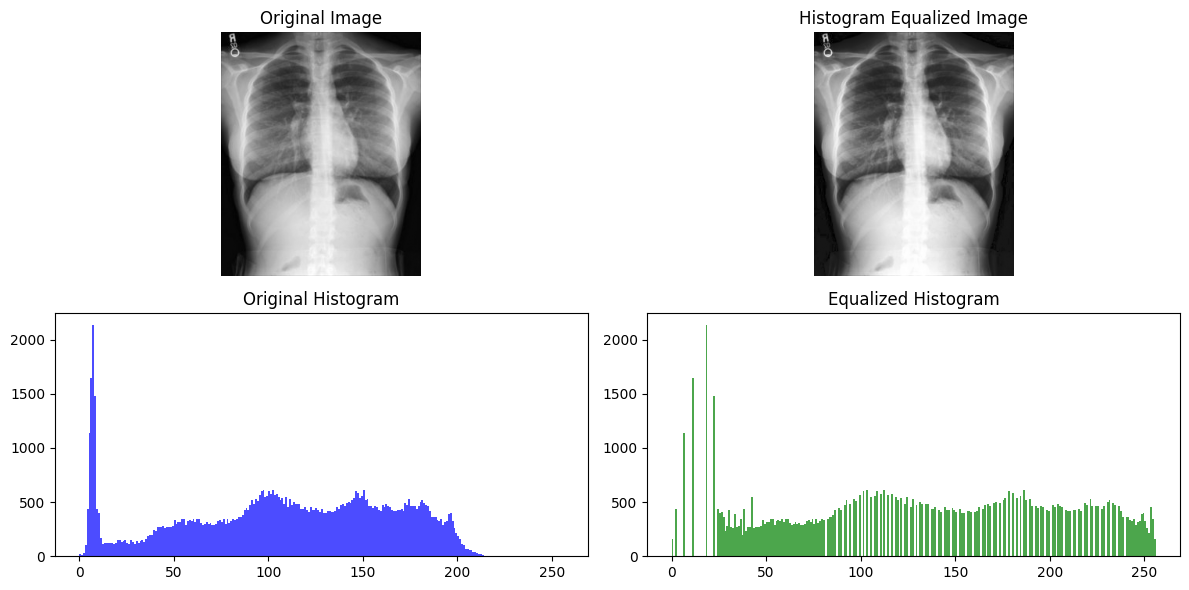

In [ ]:
# Plot the Result
plt.figure(figsize=(12, 6))

#Plot the Image
plt.subplot(2,2,1)
plt.imshow(histogram_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 3)
plt.hist(histogram_image.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title('Original Histogram')

# Equalized histogram
plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()

#Question-06

For a sample medical image, apply the 2D Fourier transform to your image. Demonstrate how you will perform low-pass and high-pass filtering in the frequency domain. Please include both spatial and frequency domain representations in your report after filtering.

➔Question: What is the advantage of performing filtering in the frequency domain (as opposed to performing it in spatial domain)?

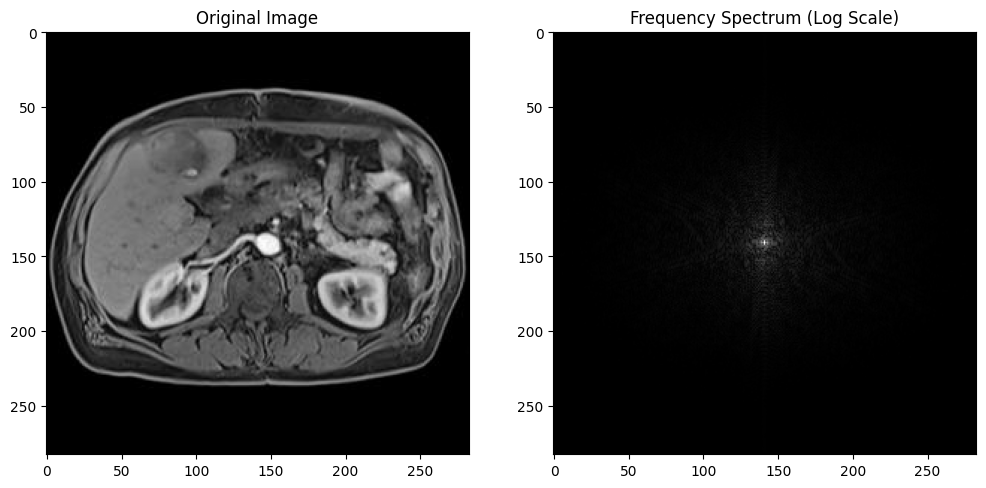

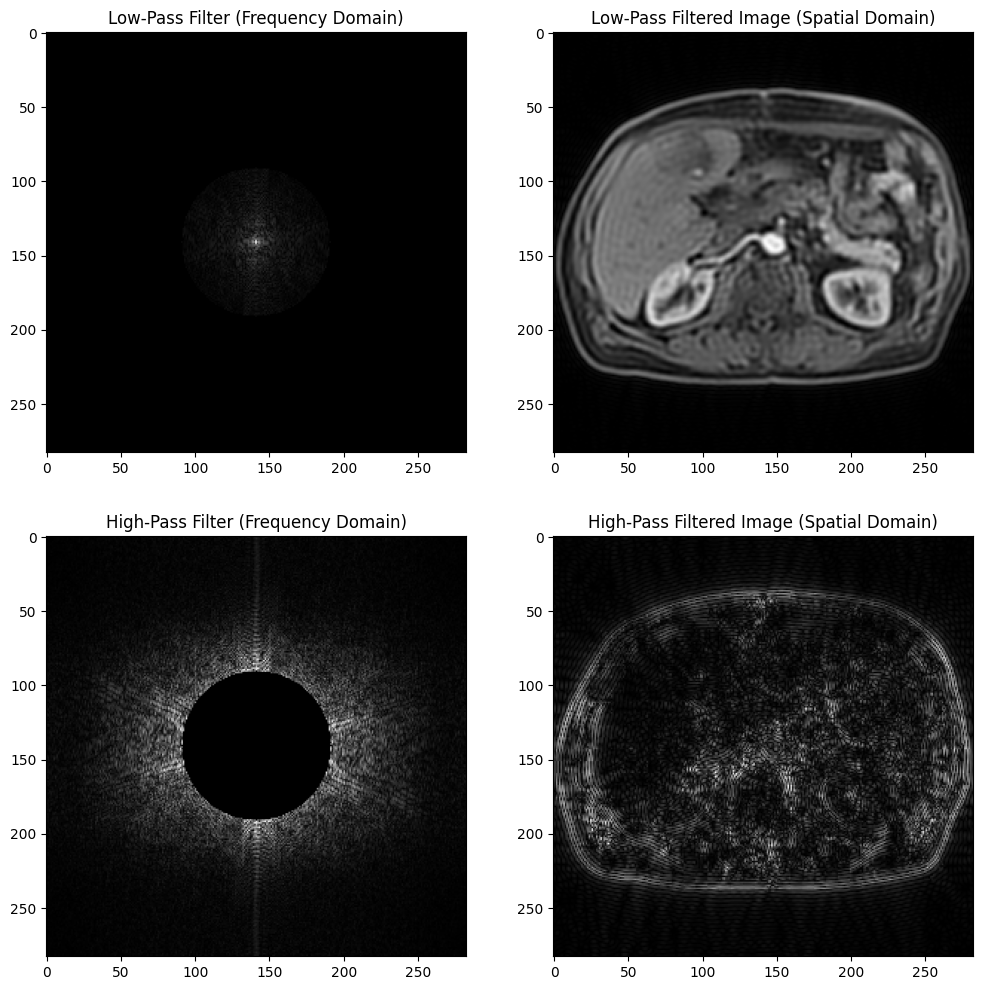

In [ ]:
# Load a grayscale medical image
image = io.imread('/content/drive/MyDrive/sample_images/liver.jpg', as_gray=True)
image = image / 255.0  # Normalize pixel values

# Apply 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Visualize the original image and its frequency spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Frequency Spectrum (Log Scale)")
plt.imshow(np.log(1 + np.abs(f_transform_shifted)), cmap='gray')
plt.show()

# Create Low-Pass Filter (LPF)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center
radius = 50  # Radius of the low-pass filter
lpf_mask = np.zeros_like(image)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
lpf_mask[mask_area] = 1

# Create High-Pass Filter (HPF)
hpf_mask = 1 - lpf_mask

# Apply Low-Pass Filter
low_pass = f_transform_shifted * lpf_mask
low_pass_image = np.fft.ifft2(np.fft.ifftshift(low_pass))
low_pass_image = np.abs(low_pass_image)

# Apply High-Pass Filter
high_pass = f_transform_shifted * hpf_mask
high_pass_image = np.fft.ifft2(np.fft.ifftshift(high_pass))
high_pass_image = np.abs(high_pass_image)

# Visualize the filtered results
plt.figure(figsize=(12, 12))
# Low-Pass Filtering
plt.subplot(2, 2, 1)
plt.title("Low-Pass Filter (Frequency Domain)")
plt.imshow(np.log(1 + np.abs(low_pass)), cmap='gray')
plt.subplot(2, 2, 2)
plt.title("Low-Pass Filtered Image (Spatial Domain)")
plt.imshow(low_pass_image, cmap='gray')

# High-Pass Filtering
plt.subplot(2, 2, 3)
plt.title("High-Pass Filter (Frequency Domain)")
plt.imshow(np.log(1 + np.abs(high_pass)), cmap='gray')
plt.subplot(2, 2, 4)
plt.title("High-Pass Filtered Image (Spatial Domain)")
plt.imshow(high_pass_image, cmap='gray')
plt.show()


#Question-07


Choose a 2D gray level medical image or a slice of a 3D gray level medical image.

Open it with Matlab and display it in a window using (for example) the “imshow” or “imagesc” functions.

Compute and display the norm of the image gradient (gray-level image) using the “imgradient” or “gradient” functions as well as an edge map (binary image) derived from the gradient by empirical thresholding.

Apply Sobel, Prewitt, Canny, and Laplacian of Gaussian edge detection operators using for example the “edge” function and display the results.

➔Question: Compare and discuss these edge detection methods. [100 to 150 words]

Add a reasonable amount of Gaussian noise to your original image using the “imnoise” function; display the noisy image. Apply all the previous operators on the noisy image and display the results.

➔Question: Compare and discuss the behavior of each operator in the presence of noise. [100 to 150 words]

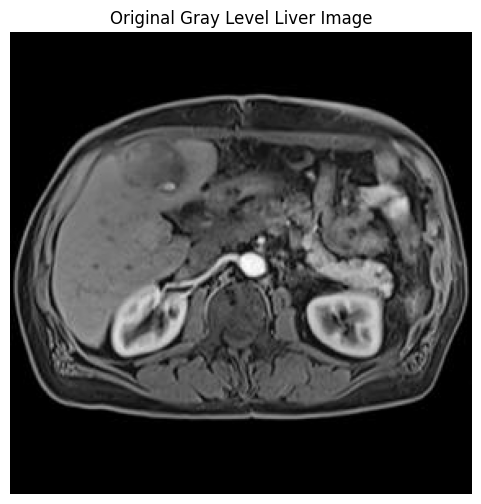

In [ ]:
from skimage import filters
from skimage.feature import canny
from skimage.filters import sobel, prewitt, laplace

image = cv2.imread('/content/drive/MyDrive/sample_images/liver.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Gray Level Liver Image")
plt.axis('off')
plt.show()


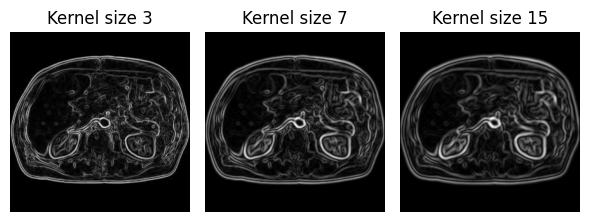

In [ ]:


grad_x_3 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
grad_y_3 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction
#Magn
gradient_magnitude_3 = np.sqrt(grad_x_3**2 + grad_y_3**2)

#Sobel image gradient k=9
grad_x_9 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=9)
grad_y_9 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=9)
#Magn
gradient_magnitude_9 = np.sqrt(grad_x_9**2 + grad_y_9**2)

# Sobel image gradient k=15
grad_x_15 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=15)
grad_y_15 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=15)
#Magn
gradient_magnitude_15 = np.sqrt(grad_x_15**2 + grad_y_15**2)

#Plot results
fig, axes = plt.subplots(1, 3, figsize=(6, 6))

titles_sob = ["Kernel size 3", "Kernel size 7", "Kernel size 15"]
images_sob = [gradient_magnitude_3,gradient_magnitude_9 ,gradient_magnitude_15]

for i, ax in enumerate(axes.flat):
    if images_sob[i] is not None:
        ax.imshow(images_sob[i], cmap='gray')
        ax.set_title(titles_sob[i])
        ax.axis('off')

plt.tight_layout()
plt.show()

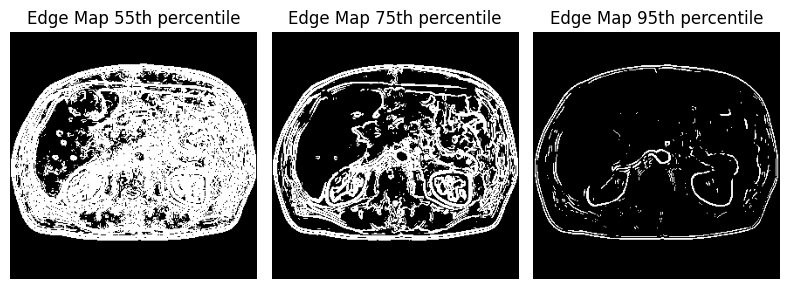

In [ ]:
#Empirical thresholding using kernel 3 and different percentiles for comparison
threshold_55p = np.percentile(gradient_magnitude_3, 55)  #55th percentile
edge_map_55p = (gradient_magnitude_3 > threshold_55p).astype(np.uint8)

threshold_75p = np.percentile(gradient_magnitude_3, 75)  #75th percentile
edge_map_75p = (gradient_magnitude_3 > threshold_75p).astype(np.uint8)

threshold_95p = np.percentile(gradient_magnitude_3, 95)  #95th percentile
edge_map_95p = (gradient_magnitude_3 > threshold_95p).astype(np.uint8)

#Plot results
fig, axes = plt.subplots(1, 3, figsize=(8, 8))

titles_edge = ["Edge Map 55th percentile", "Edge Map 75th percentile", "Edge Map 95th percentile"]
images_edge = [edge_map_55p, edge_map_75p ,edge_map_95p]

for i, ax in enumerate(axes.flat):
    if images_edge[i] is not None:
        ax.imshow(images_edge[i], cmap='gray')
        ax.set_title(titles_edge[i])
        ax.axis('off')

plt.tight_layout()
plt.show()

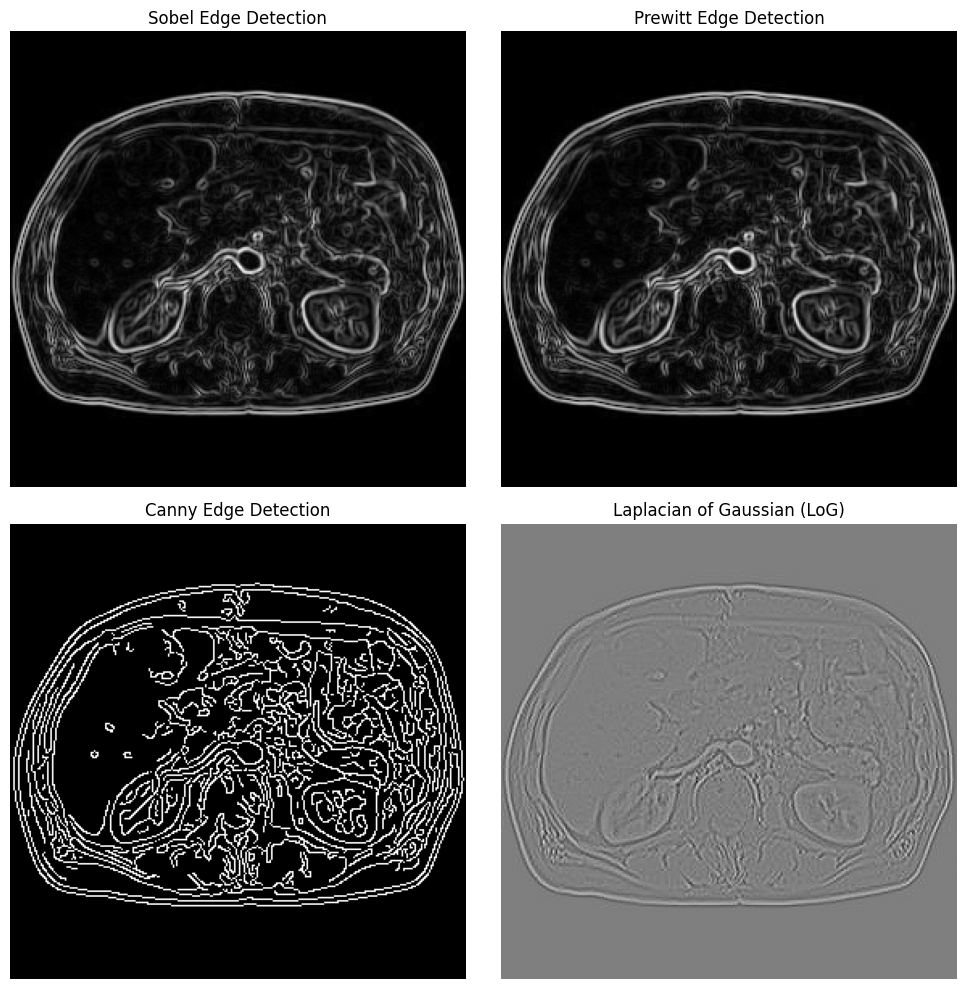

In [ ]:
#Edge detection methods
sobel_edges = sobel(image)
prewitt_edges = prewitt(image)
canny_edges = canny(image, sigma=1)
laplacian_edges = laplace(image)

#Results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles_det = ["Sobel Edge Detection", "Prewitt Edge Detection",
              "Canny Edge Detection", "Laplacian of Gaussian (LoG)"]
images_det = [sobel_edges,prewitt_edges ,
              canny_edges, laplacian_edges]

for i, ax in enumerate(axes.flat):
    if images_det[i] is not None:
        ax.imshow(images_det[i], cmap='gray')
        ax.set_title(titles_det[i])
        ax.axis('off')

plt.tight_layout()
plt.show()

Add a reasonable amount of Gaussian noise to your original image using the “imnoise” function; display the noisy image. Apply all the previous operators on the noisy image and display the results.

➔ Question: Compare and discuss the behavior of each operator in the presence of noise. [100 to 150 words]

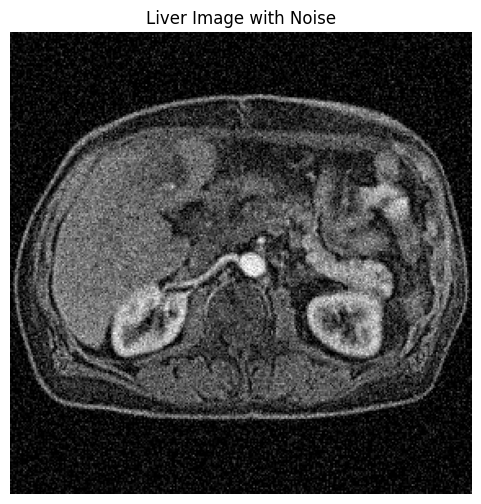

In [ ]:
image_liver_noise = cv2.imread('/content/drive/MyDrive/sample_images/liver.jpg', cv2.IMREAD_GRAYSCALE)

# Generate noisy images
gaussian_noisy_liver = add_gaussian_noise(image_liver_noise, mean=0, std=25)

plt.figure(figsize=(6, 6))
plt.imshow(gaussian_noisy_liver, cmap='gray')
plt.title("Liver Image with Noise")
plt.axis('off')
plt.show()

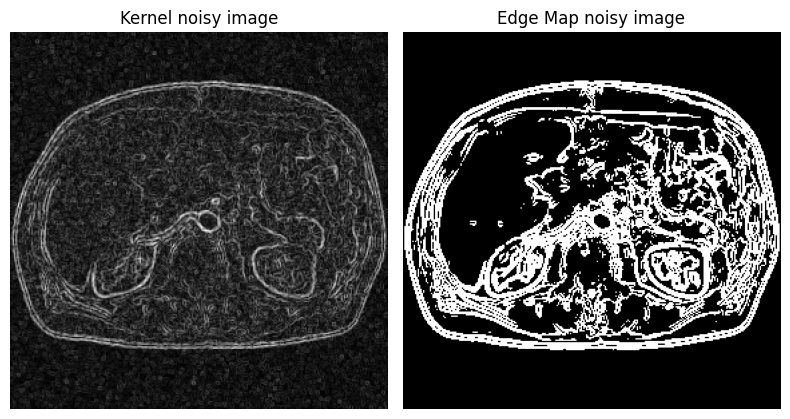

In [ ]:
grad_x_3n = cv2.Sobel(gaussian_noisy_liver, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
grad_y_3n = cv2.Sobel(gaussian_noisy_liver, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction
#Magn
gradient_magnitude_3n = np.sqrt(grad_x_3n**2 + grad_y_3n**2)

threshold_75pn = np.percentile(gradient_magnitude_3n, 75)  #75th percentile
edge_map_75pn = (gradient_magnitude_3 > threshold_75p).astype(np.uint8)

#Plot results
fig, axes = plt.subplots(1, 2, figsize=(8, 8))

titles_noisy = ["Kernel noisy image", "Edge Map noisy image"]
images_noisy = [gradient_magnitude_3n, edge_map_75pn]

for i, ax in enumerate(axes.flat):
    if images_noisy[i] is not None:
        ax.imshow(images_noisy[i], cmap='gray')
        ax.set_title(titles_noisy[i])
        ax.axis('off')

plt.tight_layout()
plt.show()

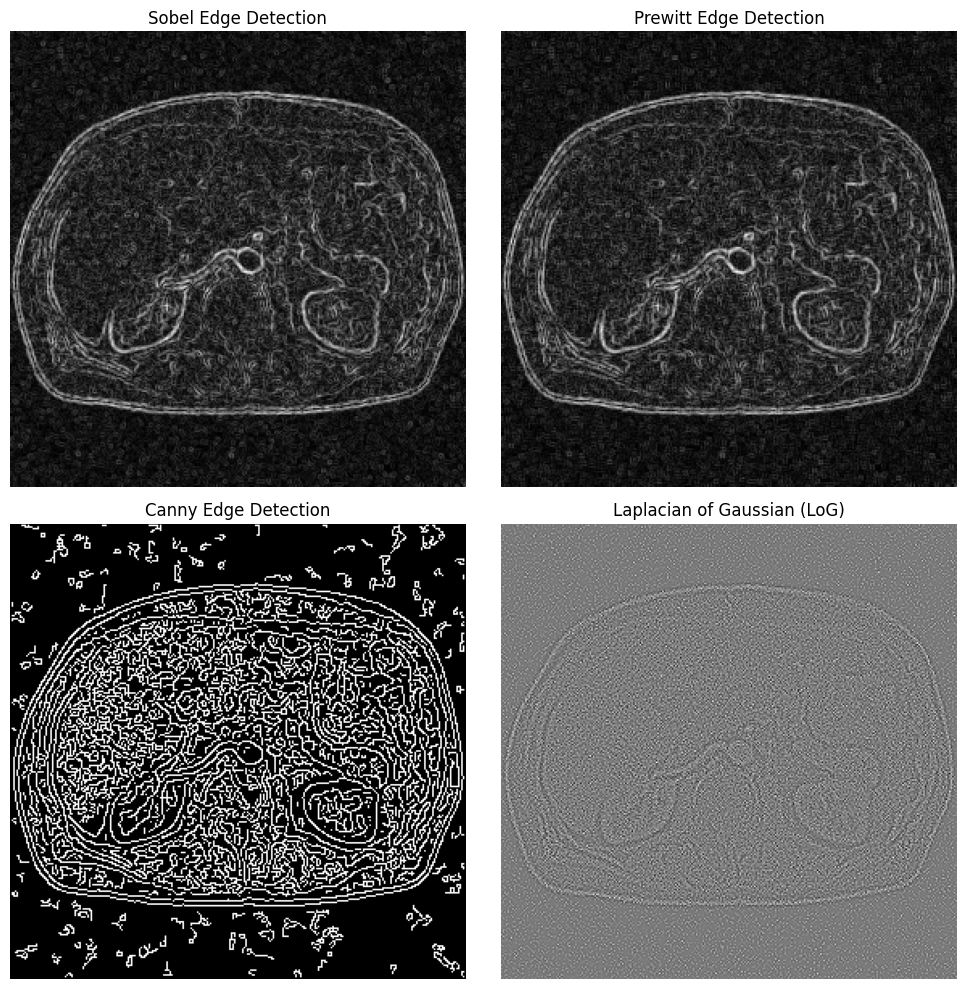

In [ ]:
#Edge detection methods in noisy image
sobel_edges_n = sobel(gaussian_noisy_liver)
prewitt_edges_n = prewitt(gaussian_noisy_liver)
canny_edges_n = canny(gaussian_noisy_liver, sigma=1)
laplacian_edges_n = laplace(gaussian_noisy_liver)

#Results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles_det_n = ["Sobel Edge Detection", "Prewitt Edge Detection",
              "Canny Edge Detection", "Laplacian of Gaussian (LoG)"]
images_det_n = [sobel_edges_n,prewitt_edges_n ,
              canny_edges_n, laplacian_edges_n]

for i, ax in enumerate(axes.flat):
    if images_det_n[i] is not None:
        ax.imshow(images_det_n[i], cmap='gray')
        ax.set_title(titles_det_n[i])
        ax.axis('off')

plt.tight_layout()
plt.show()